In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset

df = pd.read_csv('data.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


# UNDERSTANDING THE DATASET

age (#)

sex : 1 = Male, 0 = Female (Binary)

(cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

(trestbps) resting blood pressure (#)

(chol) serum cholestoral in mg/dl (#)

(fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]

(restecg) resting electrocardiographic results [values 0,1,2]

(thalach) maximum heart rate achieved (#)

(exang) exercise induced angina (Binary) [1 = yes; 0 = no]

(oldpeak) = ST depression induced by exercise relative to rest (#)

(slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)

(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy

(thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

# DATA CLEANING

In [5]:
# null values in the original dataset are represented with '?' We need to clean the data and replace the ? with NaN

df.replace(["?"], np.nan, inplace=True)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    object 
 4   chol        271 non-null    object 
 5   fbs         286 non-null    object 
 6   restecg     293 non-null    object 
 7   thalach     293 non-null    object 
 8   exang       293 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    object 
 11  ca          3 non-null      object 
 12  thal        28 non-null     object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


'cp' in the data info shows that the variable is a an integer but from the dataset description, it shows it is a categorical variable.

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

Leaving this variable as an integer would make all our statistical analysis wrong as this variable has no "numerical significance"

In [8]:
# we change the Variable in this line of code

df['cp'] = df['cp'].astype('object')

'num' in the data info shows that the variable is a an integer but from the dataset description, it shows it is a categorical variable. Leaving this variable as an integer would make all our statistical analysis wrong as this variable has no "numerical significance." num is also the target variable so, this would also determine the statistical tests to perform.


diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing
A smaller the diameter narrowing, the higher the chances of getting a heart attack

In [25]:
# we change the Variable in this line of code
# also the variable num has a lot of white spaces in it, let's remove that

df.rename(columns={'num       ': 'num'}, inplace=True)

In [26]:
df['num'] = df['num'].astype('object')

# VISUALIZATION

C:\Users\VICTOR JOY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num', ylabel='count'>

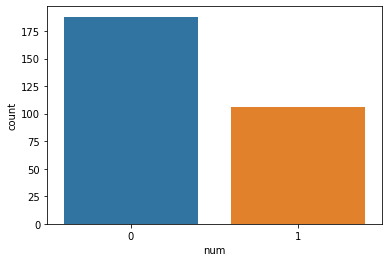

In [33]:
sns.countplot(df['num'])

The distribution of the target variabe shows over 175 people with Value 0 and 100 with Value 1
Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing

# HYPOTHESIS

### DOES AGE AFFECT THE CHANCES OF GETTING A HEART ATTACK?

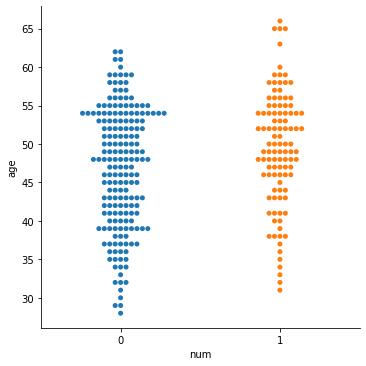

In [35]:
sns.catplot(x="num", y="age", kind="swarm", data=df)

People within the age of 35-60 are more likely to get a heart attack. Especially if the person is within the ages of 47-55.
YES, age does affect the chances of getting a heart attack

### DOES GENDER AFFECT THE CHANCES OF GETTING A HEART ATTACK

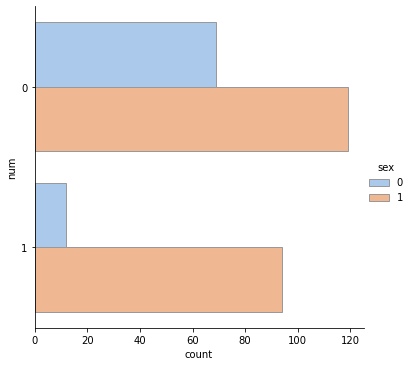

In [36]:
sns.catplot(y="num", hue="sex", kind="count", palette="pastel", edgecolor=".6",data=df)

Sex: 1 = Male, 0 = Female

Focusing on num value 0, we see a high chance of getting a heart attack, so YES, the Male gender has a higher chance of getting a heart attack

# DEALING WITH MISSING VALUES

In [13]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [14]:
df.shape

(294, 14)